## Set Up

### Import Libraries

In [1]:
# import keypoint moseq and seaborn
import keypoint_moseq as kpms
import seaborn as sns

### Specify File Paths

When assigning the variable *project_dir*, you need to naviagte to the location where you downloaded the data from this analysis.
Then, navigate to which group of mice you would like to analyze. On Windows, right click the folder, hit "copy as path" and paste after "project_dir=". Then, edit the file path so that all of the single slashes become double slashes. 

When assigning the variable *model_name*, pick either iMSN_model or dMSN_model. This should correspond to the folder assigned to *project_dir*.

In [3]:
project_dir = "C:\\Users\\Owner\\OneDrive\\Desktop\\muntean_lab\\KCTD5_MoSeq_Analysis-main\\KPMS_models\\dMSN" # the full path to the project directory
model_name='dMSN_model' # name of model to analyze

## Get Data Frames

You can either compute the dataframes yourself using MoSeq, or you can use the .csv files already provided in the data folder. 

### Option 1: Compute Data Frames

In [7]:
# Compute data frames

# moseq df
moseq_df = kpms.compute_moseq_df(project_dir, model_name, smooth_heading=True) 
moseq_df

# The groups should already be assigned. 
# running the interactive_group_setting command avoids an error with the index
#kpms.interactive_group_setting(project_dir, model_name)

# stats df
stats_df = kpms.compute_stats_df(
    project_dir,
    model_name,
    moseq_df, 
    min_frequency=0.005,       # threshold frequency for including a syllable in the dataframe
    groupby=['group', 'name'], # column(s) to group the dataframe by
    fps=30)  

In [9]:
# Run this code block to save the dataframes as .csv files 
import os

# save moseq_df
save_dir = os.path.join(project_dir, model_name) # directory to save the moseq_df dataframe
moseq_df.to_csv(os.path.join(save_dir, 'moseq_df.csv'), index=False)
print('Saved `moseq_df` dataframe to', save_dir)

# save stats_df
save_dir = os.path.join(project_dir, model_name)
stats_df.to_csv(os.path.join(save_dir, 'stats_df.csv'), index=False)
print('Saved `stats_df` dataframe to', save_dir)

Saved `moseq_df` dataframe to C:\Users\Owner\OneDrive\Desktop\muntean_lab\KCTD5_MoSeq_Analysis-main\KPMS_models\dMSN\dMSN_model
Saved `stats_df` dataframe to C:\Users\Owner\OneDrive\Desktop\muntean_lab\KCTD5_MoSeq_Analysis-main\KPMS_models\dMSN\dMSN_model


### Option 2: Use Provided Data Frames

The name of the stats_df csv file will be either "stats_df_dMSN.csv" or "stats_df_iMSN.csv"
The name of the moseq_df csv file will be either "moseq_df_dMSN.csv" or "moseq_df_iMSN.csv"

In [7]:
# or use the data frames provided
import pandas as pd

# this will automatically build the file paths based on what you entered at the beginning 
if (model_name == 'iMSN_model'):
    stats_file = "stats_df_iMSN.csv"
    moseq_file = "moseq_df_iMSN.csv"
elif (model_name == 'dMSN_model'):
    stats_file = "stats_df_dMSN.csv"
    moseq_file = "moseq_df_dMSN.csv"

path_to_stats = project_dir + "\\" + stats_file
path_to_moseq = project_dir + "\\" + moseq_file

stats_df = pd.read_csv(path_to_stats)
moseq_df = pd.read_csv(path_to_moseq)

## Visualize

### Transitions

Group(s): D1Cre, WT
Saved figure to C:\Users\Owner\OneDrive\Desktop\muntean_lab\KCTD5_MoSeq_Analysis-main\KPMS_models\dMSN\dMSN_model\figures\transition_matrices.png
Saved figure to C:\Users\Owner\OneDrive\Desktop\muntean_lab\KCTD5_MoSeq_Analysis-main\KPMS_models\dMSN\dMSN_model\figures\transition_graphs.png
Saved figure to C:\Users\Owner\OneDrive\Desktop\muntean_lab\KCTD5_MoSeq_Analysis-main\KPMS_models\dMSN\dMSN_model\figures\transition_graphs_diff.png


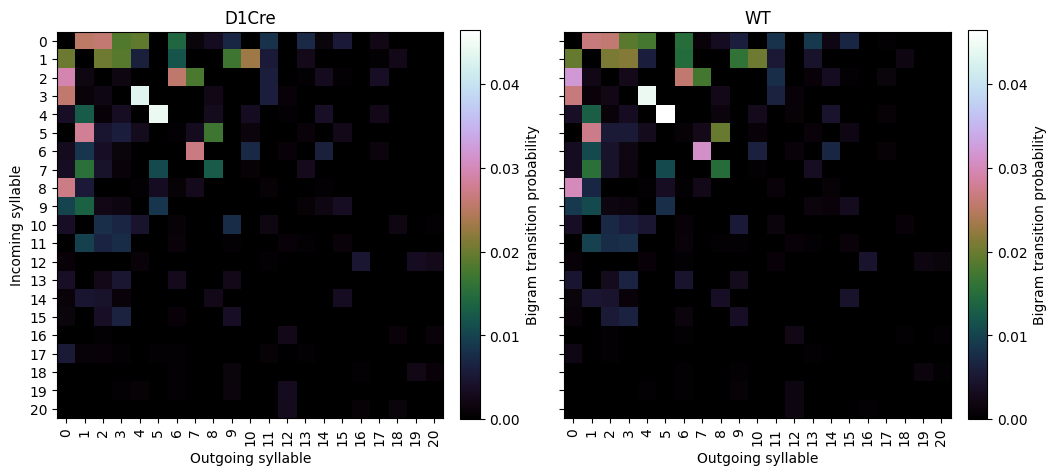

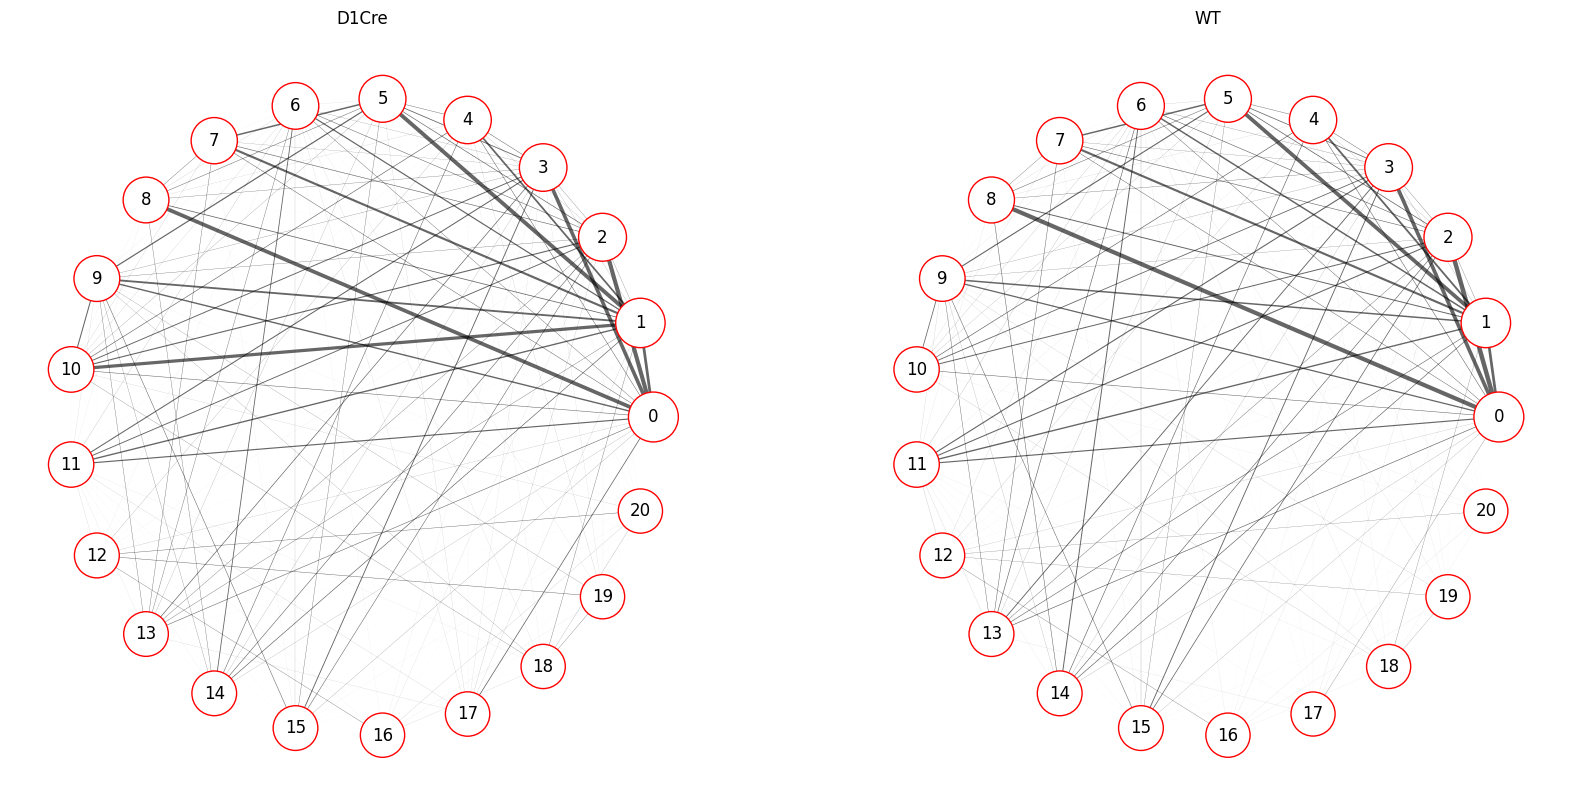

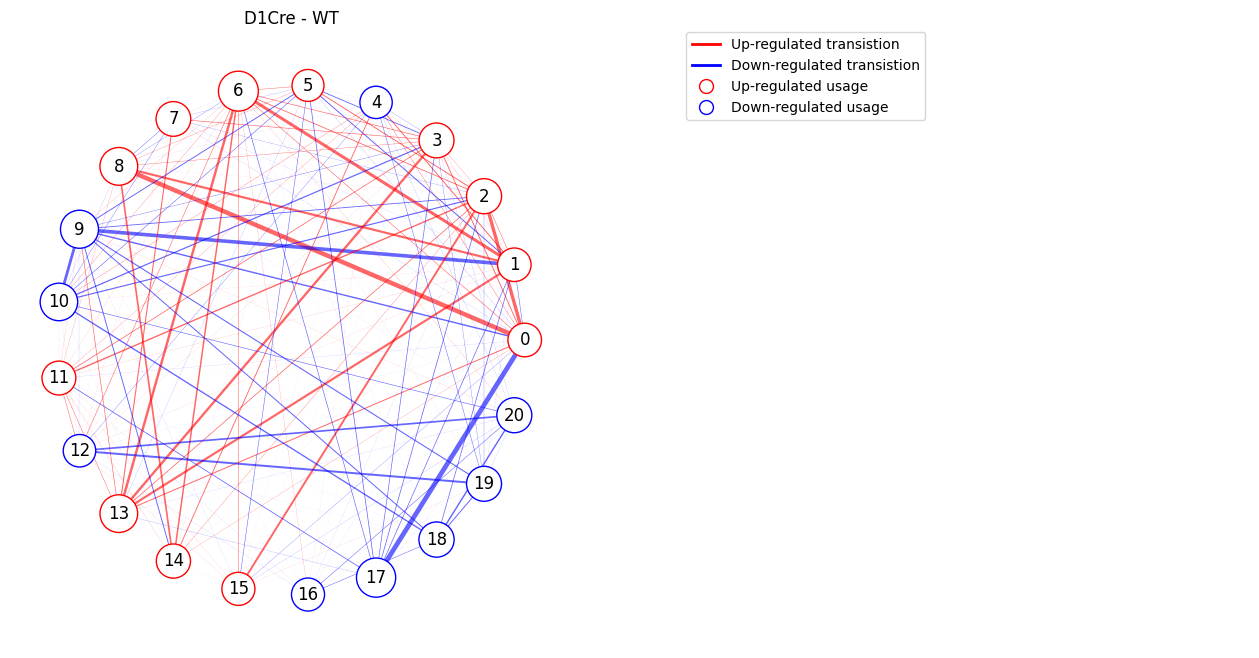

In [9]:
# Get Transition Matrices and Syllable Transition Graphs 

# Transition Matrices

normalize='bigram' # normalization method ("bigram", "rows" or "columns")

trans_mats, usages, groups, syll_include=kpms.generate_transition_matrices(
    project_dir, model_name, normalize=normalize,
    min_frequency=0.005 # minimum syllable frequency to include
)    

kpms.visualize_transition_bigram(
    project_dir, model_name, groups, trans_mats, syll_include, normalize=normalize, 
    show_syllable_names=True # label syllables by index (False) or index and name (True)
)

# Syllable Transition Graph

# Generate a transition graph for each single group
kpms.plot_transition_graph_group(
    project_dir, model_name, 
    groups, trans_mats, usages, syll_include, 
    layout='circular',        # transition graph layout ("circular" or "spring")
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

# Syllable Transition Difference Graph

# Generate a difference-graph for each pair of groups.

kpms.plot_transition_graph_difference(project_dir, model_name, 
                                      groups, trans_mats, usages, syll_include, 
                                      layout='circular') # transition graph layout ("circular" or "spring")

### Syllable Frequency

C:\Users\Owner\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\Owner\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Axes: xlabel='syllable', ylabel='frequency'>

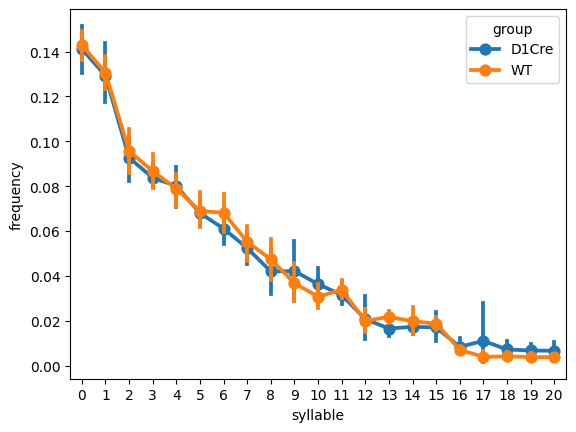

In [11]:
sns.pointplot(x = "syllable", 
              y = "frequency", 
              hue = "group", 
              data = stats_df) 